### Exploração Inicial dos Dados

#### Carregando os Dados

In [ ]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

#Carregando o dado com um encoding diferente de UTF-8, estava dando muitos problemas
df = pd.read_csv('dados/Superstore.csv', encoding='ISO-8859-1')

#Visualizando as primeiras linhas
print(df.head())

#Verificando os tipos de dados
print(df.dtypes)

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

### Estatisticas Decritivas

In [ ]:
#Estatísticas descritivas
print(df.describe())

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


### Identificação de Valores Faltantes, Duplicados e Inconsistências

In [ ]:
#Verificando se tem valores nulos
print(df.isnull().sum())

#Verificando se tem dados duplicados
print(df.duplicated().sum())

#Verificando se tem inconsistências, outliers, etc
print(df['Sales'].describe())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
0
count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64


#### Análise Inicial da Distribuição das Variáveis

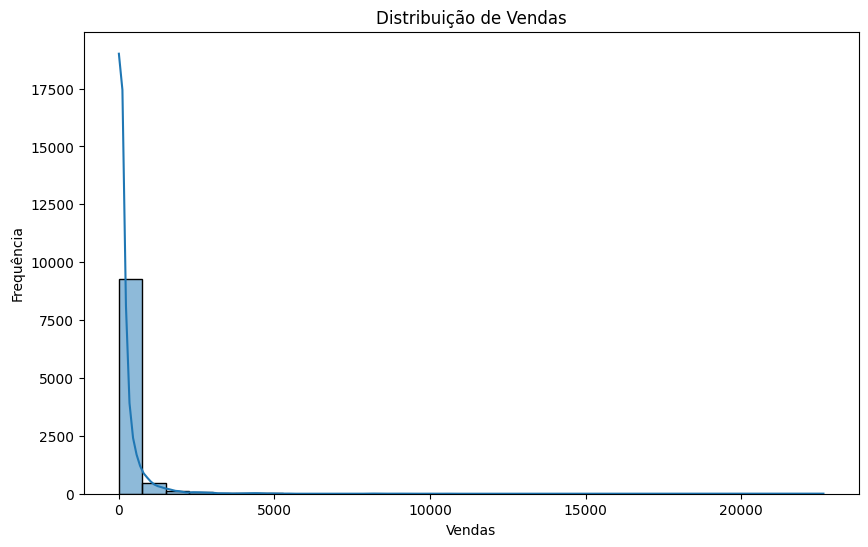

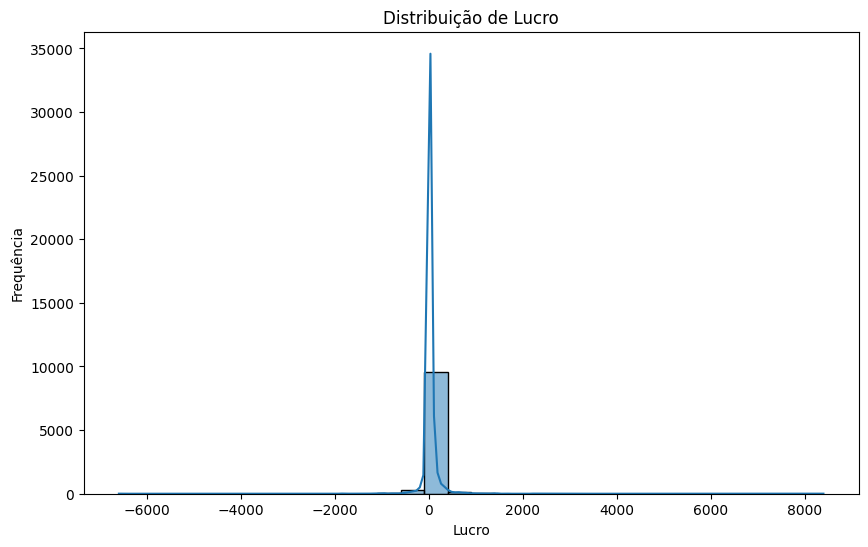

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Distribuição de vendas
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Distribuição de Vendas')
plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.show()

#Distribuição de lucro
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], bins=30, kde=True)
plt.title('Distribuição de Lucro')
plt.xlabel('Lucro')
plt.ylabel('Frequência')
plt.show()

## Limpeza e preparação dos dados

### Tratamento de Valores Nulos e Duplicadas

In [ ]:
#Removendo valores que estão duplicados
df.drop_duplicates(inplace=True)

#Preenchendo os valores nulos, só se for necessário
df.fillna(method='ffill', inplace=True)

#### Transformações Necessárias (Normalização, Encoding de Variáveis Categóricas, etc.)

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Convertendo as datas para valores de datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

#Encoding de variáveis categóricas
label_encoders = {}
categorical_columns = ['Region', 'Category', 'Sub-Category', 'Customer Name', 'Product Name']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

#### Criação de Novas Features, se Relevante

In [ ]:
#Criando a coluna de mês e ano para ajudar na visualização dos dados
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

## Análise Exploratória Detalhada

### Gráficos e Visualizações Relevantes (Distribuições, Correlações, Comparações)

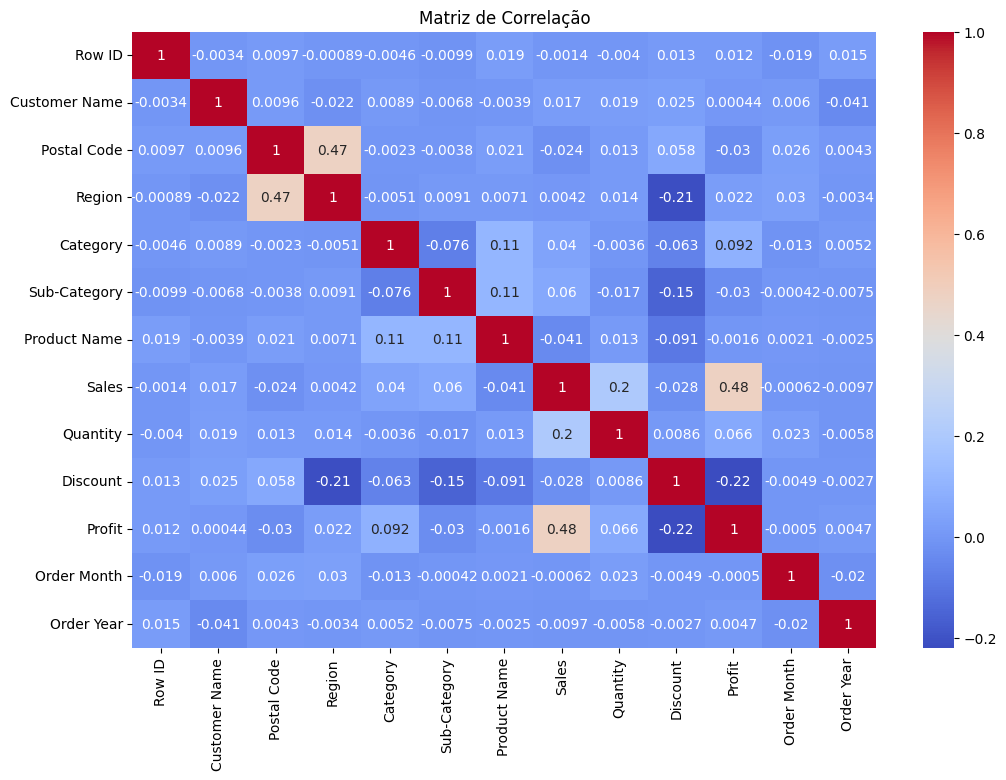

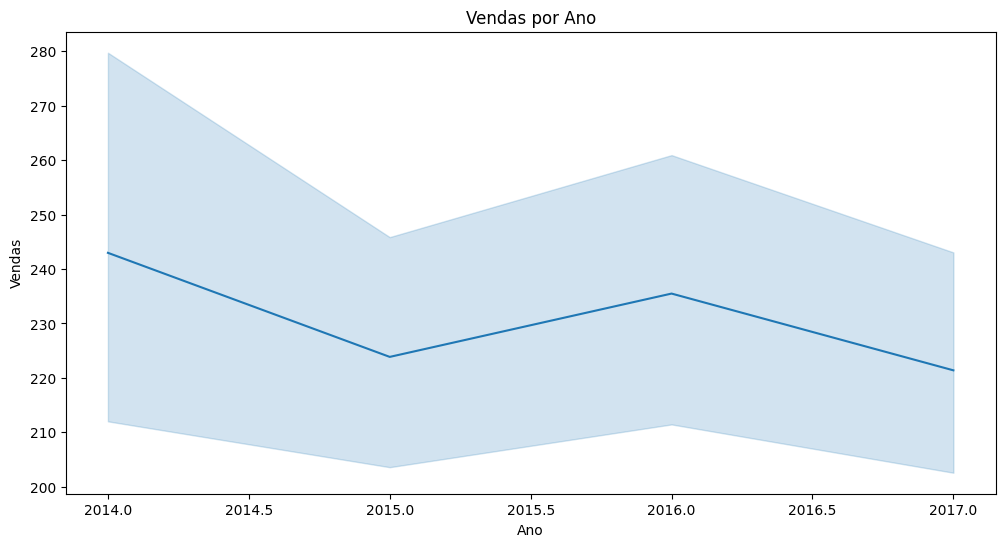

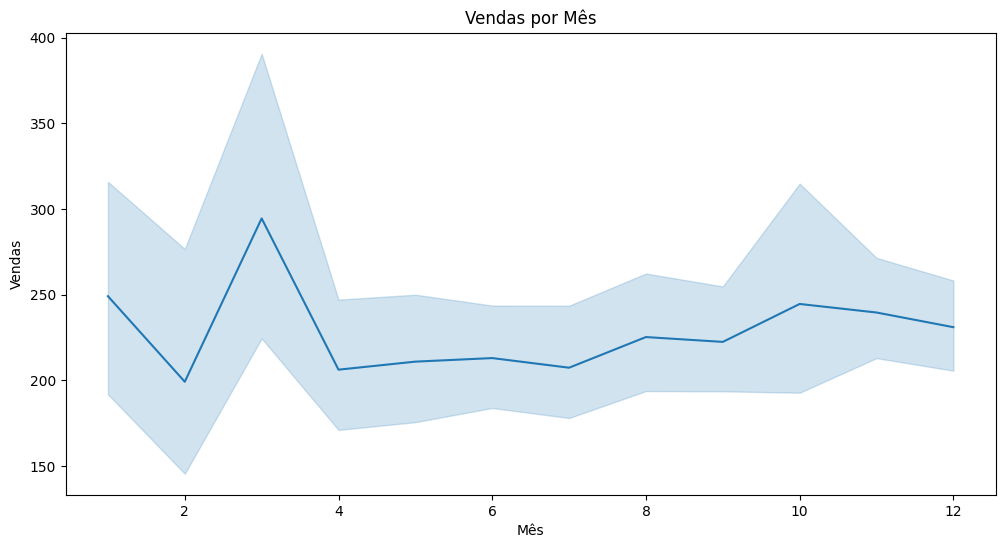

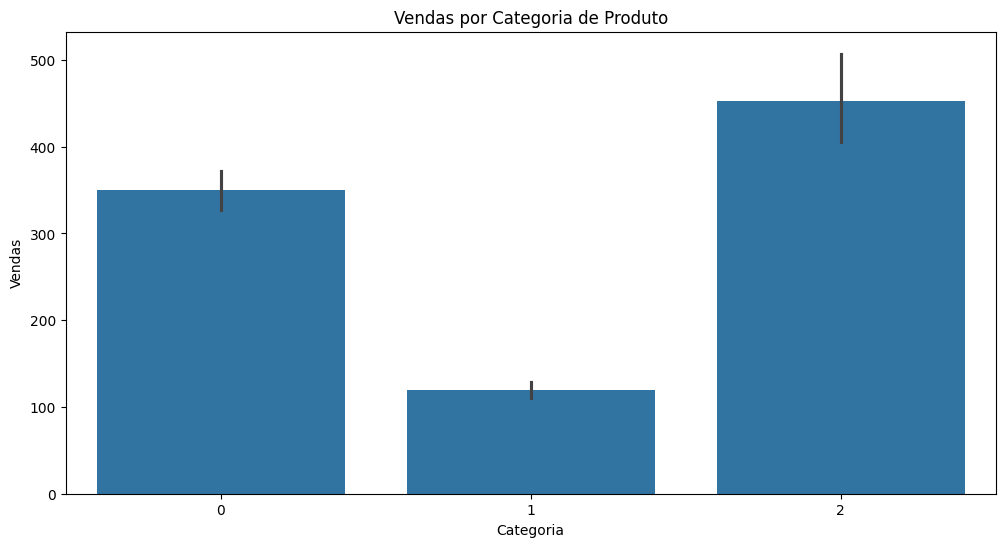

In [ ]:
#Selecionando apenas as colunas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

#Correlação entre variáveis numéricas
plt.figure(figsize=(12, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

#Distribuição de vendas por ano
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Order Year', y='Sales')
plt.title('Vendas por Ano')
plt.xlabel('Ano')
plt.ylabel('Vendas')
plt.show()

#Distribuição de vendas por mês
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Order Month', y='Sales')
plt.title('Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.show()

#Categorias de produtos mais vendidas
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Sales', data=df)
plt.title('Vendas por Categoria de Produto')
plt.xlabel('Categoria')
plt.ylabel('Vendas')
plt.show()

### Análise Estatística Básica (Média, Mediana, Desvio Padrão, Correlação)

In [ ]:
#Estatísticas básicas
print(df[numeric_cols].agg(['mean', 'median', 'std']))

             Row ID  Customer Name   Postal Code    Region  Category  \
mean    4997.500000     400.614169  55190.379428  1.570642  0.972584   
median  4997.500000     406.000000  56430.500000  1.000000  1.000000   
std     2885.163629     228.304588  32063.693350  1.162329  0.629544   

        Sub-Category  Product Name       Sales  Quantity  Discount  \
mean        7.590454    922.324795  229.858001  3.789574  0.156203   
median      9.000000    907.000000   54.490000  3.000000  0.200000   
std         5.051429    531.515975  623.245101  2.225110  0.206452   

            Profit  Order Month   Order Year  
mean     28.656896     7.809686  2015.722233  
median    8.666500     9.000000  2016.000000  
std     234.260108     3.284654     1.123555  


## Escolha e Treinamento de Modelo(s)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Separando as variáveis independentes e dependentes
X = df[['Quantity', 'Discount', 'Order Month', 'Order Year']]
y = df['Sales']

#Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Treinando o modelo
model = LinearRegression()
model.fit(X_train, y_train)

#Avaliando o modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')

MSE: 569289.0646531689
R²: 0.03624535042683008


### Avaliação do modelo

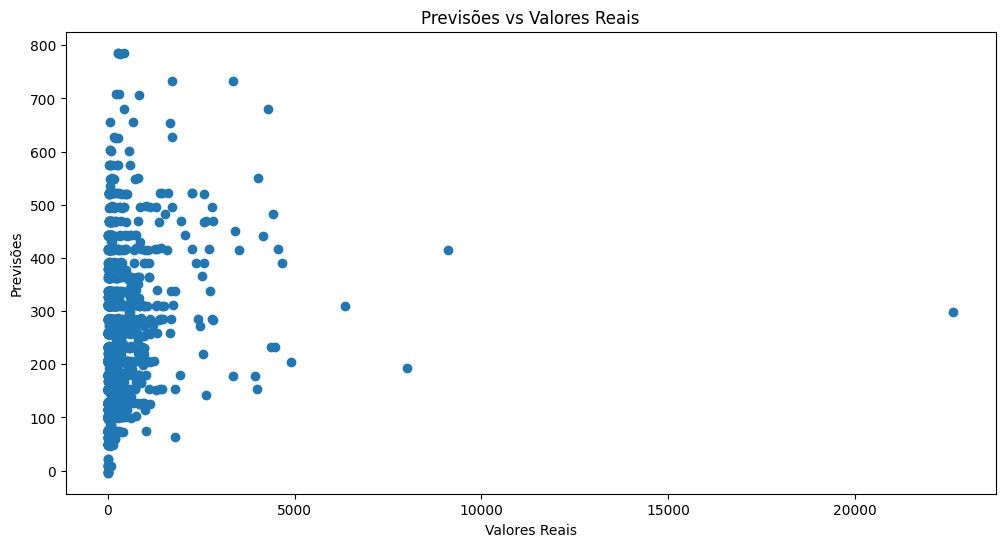

In [ ]:
#Previsões vs valores reais
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.title('Previsões vs Valores Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.show()

### Interpretação dos Resultados e Importância das Features

In [ ]:
#Mostrando a importância das features
importances = model.coef_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importances)

Quantity        52.733298
Order Month      0.191581
Order Year      -0.326208
Discount      -128.707862
dtype: float64
